# In this, We see about the handling of missing Numerical data's 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("F:/files/Titanic.csv")

# First Analyze the data which is having Null values

In [3]:
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 null values,
Cabin has 687 null values,
Embarked has 2 null values

# Replacing the NULL values in Age column with the Mean, Median and Mode of the Age column

In [7]:
def central_tendency(df,var,dic):
    for i,j in dic.items():
        df[var + "_" + i] = df[var].fillna(j)

In [8]:
df = df[['Age', 'Cabin', 'Embarked']]

In this Age is an Numerical Variable

In [9]:
from statistics import mode
lst = [np.around(df['Age'].mean(),2), df['Age'].median(), df['Age'].mode()[0]]
dic = {
    "mean" : lst[0],
    "median" : lst[1],
    "mode" : lst[2]
}

In [10]:

central_tendency(df,'Age', dic)

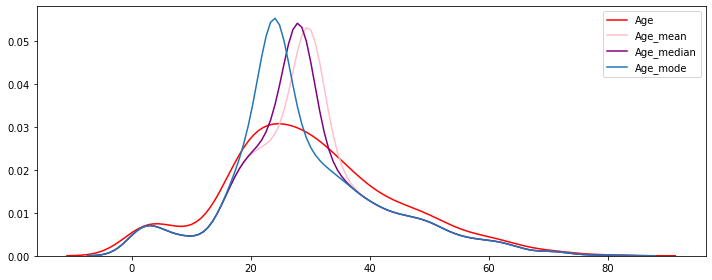

In [11]:
fig = plt.figure(figsize = (10,4))

sns.kdeplot(df['Age'], color = 'r')

sns.kdeplot(df['Age_mean'], color = 'pink')

sns.kdeplot(df['Age_median'], color = "purple")

sns.kdeplot(df['Age_mode'])
plt.tight_layout()
plt.show()

Its makes some distortions among variance.

when we know std for all.....

In [12]:
for i in df.columns:    
    if "age" in str(i).lower():
        print(i, ":", df[i].std()) 

Age : 14.526497332334044
Age_mean : 13.002015230774283
Age_median : 13.019696550973194
Age_mode : 13.199571767746487


# Changing with Random values 

In [13]:
df = data.copy()

In [14]:
df = df[['Age',]]

In [15]:
from random import sample
def randomchange(df,var):
    df[var + '_random'] = df[var]
    global random_sample
    random_sample = df[var].dropna().sample(df[var].isnull().sum())
    random_sample.index = df[df[var].isnull()].index
    
    df.loc[df[var].isnull(), var + '_random'] = random_sample

In [16]:
randomchange(df,'Age')

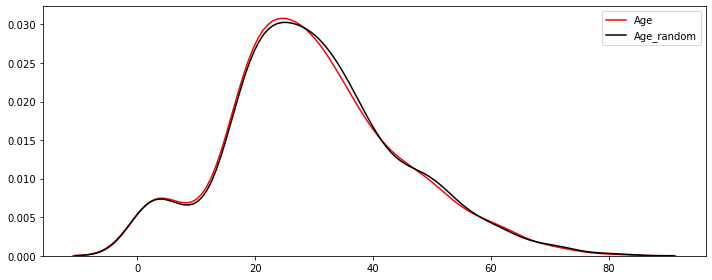

In [17]:
fig = plt.figure(figsize = (10,4))

sns.kdeplot(df['Age'], color = 'r')

sns.kdeplot(df['Age_random'], color = "black")
plt.tight_layout()
plt.show()

#Its looks Similar

Now See the Standard deviation

In [18]:
for i in df.columns:
    print(i, ":", df[i].std())

Age : 14.526497332334044
Age_random : 14.594557309440756


Replacing with random values looks as it is!!!!!

But it not work with all the types

# Capturing NAN values with new feature

In [19]:
df = data.copy()
df = df[['Age']]

In [20]:
df['Age_Feature'] = np.where(df['Age'].isnull(), 1,0)

In [21]:
df

,Age,Age_Feature
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


It capture the Importance of the Nan values to the machine model

disadv is curse of dimensonality, bcz it creates additional model

# End of Distribution Imputation

In [22]:
df = data.copy()
df = df[['Age']]

<Figure size 432x288 with 0 Axes>

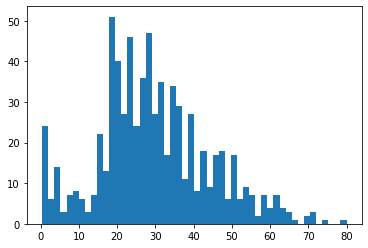

<Figure size 432x288 with 0 Axes>

In [23]:
figure = plt.hist(df['Age'], bins = 50)

plt.figure()

It seems like following normal distribution

To find the end of the distribution, we must know the third sigma value

In [24]:
extreme = df['Age'].mean() + 3 * df['Age'].std()

In [25]:
df['Age_distribution_imputation'] = df['Age'].fillna(extreme)

In [26]:
df[df['Age'].isnull()]

,Age,Age_distribution_imputation
5,NaN,73.27861
17,NaN,73.27861
19,NaN,73.27861
26,NaN,73.27861
28,NaN,73.27861
...,...,...
859,NaN,73.27861
863,NaN,73.27861
868,NaN,73.27861
878,NaN,73.27861


Now see the plot

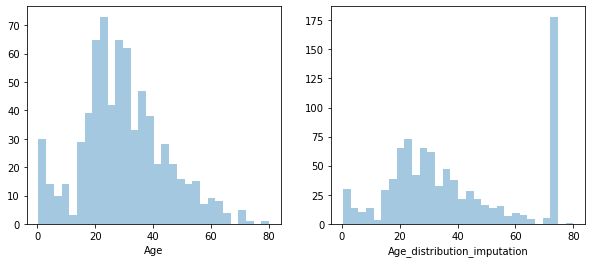

In [27]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(df['Age'], kde = False, bins = 30)
plt.subplot(1,2,2)
sns.distplot(df['Age_distribution_imputation'], kde = False, bins = 30)

#It may work sometimes

In [28]:
for i in df.columns:
    print(i , ":", df[i].std())

Age : 14.526497332334044
Age_distribution_imputation : 21.719150677136366


# Arbitrary Imputation

In [29]:
df = data.copy()

In [30]:
df = df[['Age']]

<Figure size 432x288 with 0 Axes>

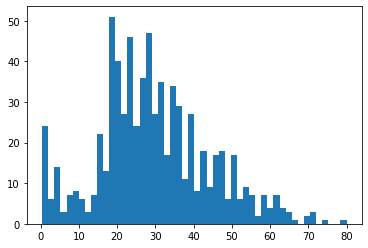

<Figure size 432x288 with 0 Axes>

In [31]:
figure = plt.hist(df['Age'], bins = 50)

plt.figure()

In [32]:
#fill the value with outliers
#that is 
df['Age_left'] = df['Age'].fillna(0)
df['Age_right'] = df['Age'].fillna(90)

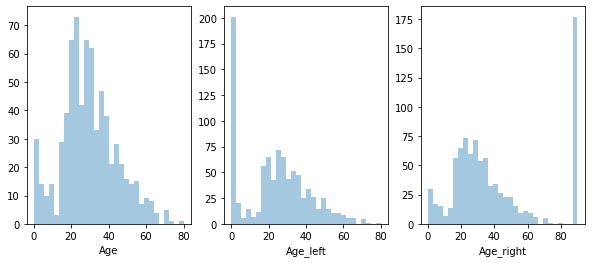

In [33]:
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'], kde = False, bins = 30)
plt.subplot(1,3,2)
sns.distplot(df['Age_left'], kde = False, bins = 30)
plt.subplot(1,3,3)
sns.distplot(df['Age_right'], kde = False, bins = 30)
plt.show()

In [34]:
for i in df.columns:
    print(i , ":", df[i].std())

Age : 14.526497332334044
Age_left : 17.596074065915886
Age_right : 27.359628636397


#This may or may not be used in few type of cases